In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Test function

In [2]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [3]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

[('x0',), ('x1',), ('x0', 'x0'), ('x0', 'x1'), ('x1', 'x1')]
[[1.     0.     0.     0.     0.     0.    ]
 [1.     0.25   0.     0.0625 0.     0.    ]
 [1.     0.5    0.     0.25   0.     0.    ]
 [1.     0.75   0.     0.5625 0.     0.    ]
 [1.     1.     0.     1.     0.     0.    ]
 [1.     0.     0.25   0.     0.     0.0625]
 [1.     0.25   0.25   0.0625 0.0625 0.0625]
 [1.     0.5    0.25   0.25   0.125  0.0625]
 [1.     0.75   0.25   0.5625 0.1875 0.0625]
 [1.     1.     0.25   1.     0.25   0.0625]
 [1.     0.     0.5    0.     0.     0.25  ]
 [1.     0.25   0.5    0.0625 0.125  0.25  ]
 [1.     0.5    0.5    0.25   0.25   0.25  ]
 [1.     0.75   0.5    0.5625 0.375  0.25  ]
 [1.     1.     0.5    1.     0.5    0.25  ]
 [1.     0.     0.75   0.     0.     0.5625]
 [1.     0.25   0.75   0.0625 0.1875 0.5625]
 [1.     0.5    0.75   0.25   0.375  0.5625]
 [1.     0.75   0.75   0.5625 0.5625 0.5625]
 [1.     1.     0.75   1.     0.75   0.5625]
 [1.     0.     1.     0.     0.     1.

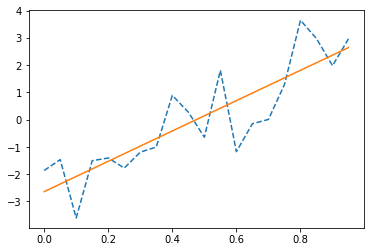

In [4]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 1)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

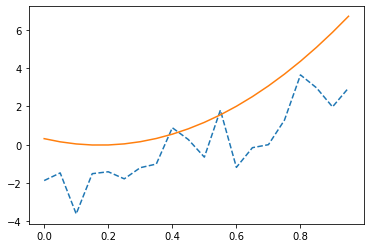

In [5]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func, p=2)
znoisy = z + noise
znoisy_centered = znoisy-np.mean(znoisy)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


(10, 10)
(10, 10)


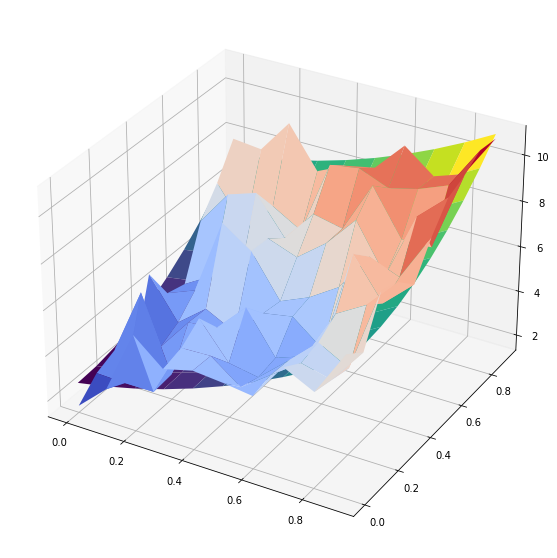

In [6]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y + np.exp(-x**2) +np.exp(-x*y) + np.exp(-y) 
xvec = np.array([x, y])
z = test_func(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func_2, p=2)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy-np.mean(znoisy)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

# b)

(100, 100)
(100, 100)


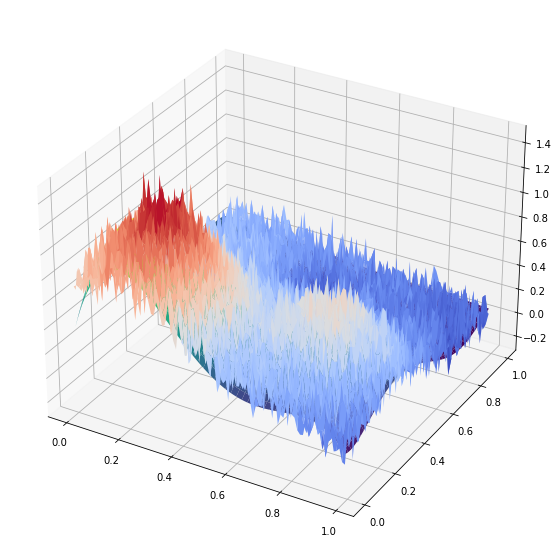

In [7]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X, znoisy_centered, znoisy = ols_fp(xvec = xvec, f = FrankeFunction, p=5, sigma = 0.1)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy_centered.reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
#ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

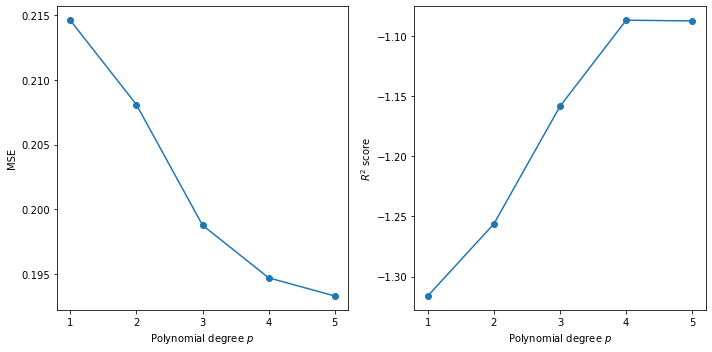

In [29]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])

mses = np.zeros((5))
Rs = np.zeros((5))
betas = []
for p in range(1,6):
    znoisy_tilde, X, znoisy_centered, znoisy, betahat = ols_fp(xvec = xvec, f = FrankeFunction, p=p, sigma=0.1, return_betas=True)
    mses[p-1] = MSE(y = znoisy,ytilde = znoisy_tilde+ np.mean(z))
    Rs[p-1] = Rscore(y = znoisy, ytilde = znoisy_tilde+ np.mean(z))
    betas.append(betahat)

fig, axs = plt.subplots(1,2, figsize=(10,5))
polydeg = np.arange(5)+1
axs[0].plot(polydeg, mses, marker='o')
axs[0].set_ylabel("MSE")
axs[1].plot(polydeg, Rs, marker='o')
axs[1].set_ylabel("$R^2$ score")
[ax.set_xlabel("Polynomial degree $p$") for ax in axs]
[ax.set_xticks(polydeg, polydeg) for ax in axs]
fig.tight_layout()

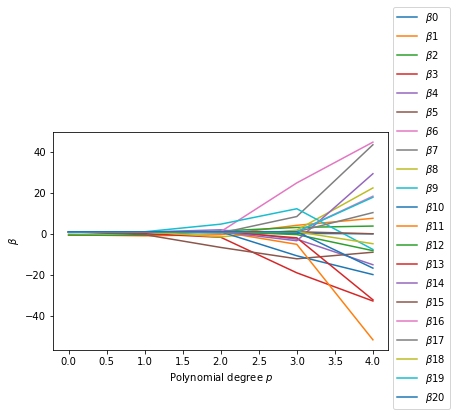

In [9]:
%matplotlib inline
beta_matrix = np.ones((5, len(betas[-1])))
for i in range(5):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(bbox_to_anchor=(1,.5,.1,1.1))

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

[None, None, None, None]

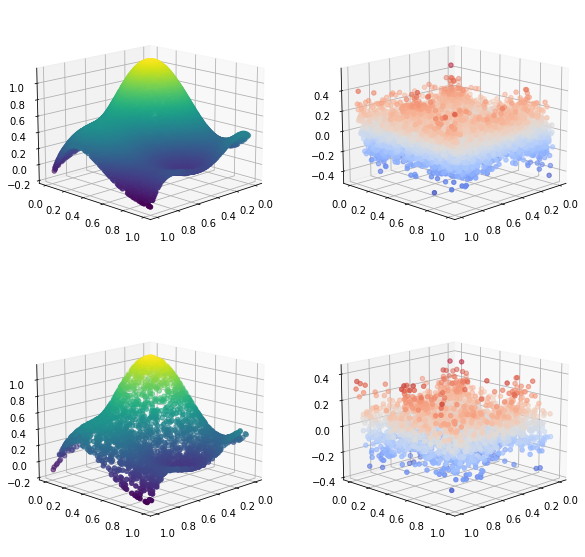

In [10]:
%matplotlib inline
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
X = make_design_matrix(xvec = xvec, p = 4)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(2,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0,0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
#axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
axs[0,1].scatter(xtrain, ytrain, np.mean(z)+ztrain-ztilde_train, c=np.mean(z)+ztrain-ztilde_train, cmap=cm.coolwarm)

axs[1,0].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
#axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)
axs[1,1].scatter(xtest, ytest, ztest + np.mean(z)-ztilde_test, c=np.mean(z)+ztest-ztilde_test, cmap=cm.coolwarm)
[ax.view_init(15,45) for ax in axs.ravel()]

# Bias-variance trade-off

### 1D test case


In [11]:
def test_func_exp(**kwargs):
    x = kwargs['x0']
    return np.exp(x -x**2) + 5*x**2 + x

In [12]:
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x = np.arange(0,1,0.05)
xvec = np.array([x])
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_exp(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 21})
    mses_train[p-1] = MSE(y = ztrain+np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain+np.mean(z), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest+np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest+np.mean(z), ytilde = ztilde_test)

Text(0.5, 0, 'Polynomial degree')

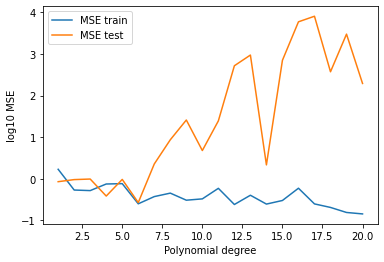

In [13]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")

## 2D Test case

In [14]:
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 21})
    mses_train[p-1] = MSE(y = ztrain+np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain+np.mean(z), ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest+np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest+np.mean(z), ytilde = ztilde_test)

Text(0.5, 0, 'Polynomial degree')

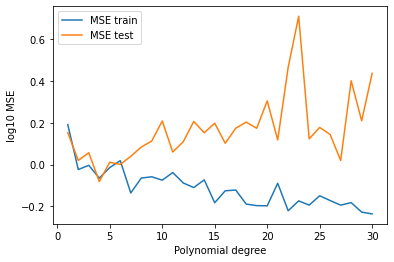

In [15]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")

In [16]:
#fig, axs = plt.subplots(1,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
#axs[0].scatter(xtrain, ytrain, ztrain-ztilde_train, c=ztrain-ztilde_train, cmap=cm.coolwarm)
#axs[1].scatter(xtest, ytest, ztest-ztilde_test, c=ztest-ztilde_test, cmap=cm.coolwarm)
#[ax.view_init(0,45) for ax in axs]

# Bias-variance trade-off Franke function

In [17]:
model_complexity = 20
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 42})
    
    mses_train[p-1] = MSE(y = ztrain + np.mean(z),ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain + np.mean(z), ytilde = ztilde_train)
    bias_train[p-1] = np.mean((ztrain-np.mean(ztilde_train))**2)
    variance_train[p-1] = np.var(ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest + np.mean(z),ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest + np.mean(z), ytilde = ztilde_test)
    bias_test[p-1] = np.mean((ztest-np.mean(ztilde_test))**2)
    variance_test[p-1] = np.var(ztilde_test)

Text(0.5, 0, 'Polynomial degree')

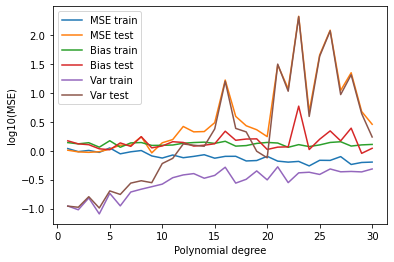

In [18]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_train), label="Bias train")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(variance_train), label="Var train")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# Bootstrap

In [19]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = 5000
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    for ik in range(k):
        z_resampled = resample(data = znoisy)
        ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = z_resampled, 
                                                                                                  **{"test_size" : 0.25, 
                                                                                                    "random_state" : 42})
        mses_train[p-1, ik] = MSE(y = ztrain + np.mean(z),ytilde = ztilde_train)
        Rs_train[p-1, ik] = Rscore(y = ztrain + np.mean(z), ytilde = ztilde_train)
        bias_train[p-1, ik] = np.mean((ztrain-np.mean(ztilde_train))**2)
        variance_train[p-1, ik] = np.var(ztilde_train)

        mses_test[p-1, ik] = MSE(y = ztest + np.mean(z),ytilde = ztilde_test)
        Rs_test[p-1, ik] = Rscore(y = ztest + np.mean(z), ytilde = ztilde_test)
        bias_test[p-1, ik] = np.mean((ztest-np.mean(ztilde_test))**2)
        variance_test[p-1, ik] = np.var(ztilde_test)

Text(0.5, 0, 'Polynomial degree')

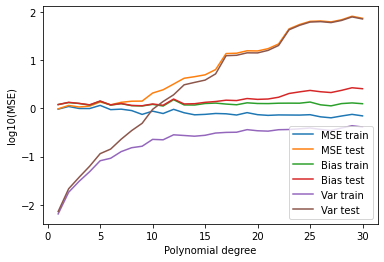

In [20]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(variance_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(variance_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# d)

In [44]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
k = 6
mses_train, var_train, bias_train, variance_train = np.zeros((model_complexity, k)), np.zeros((model_complexity,k)),np.zeros((model_complexity, k)), np.zeros((model_complexity,k))
mses_test, var_test, bias_test, variance_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
for p in range(1,model_complexity+1):
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise
    mses_train[p-1], mses_test[p-1], bias_train[p-1], bias_test[p-1], var_train[p-1], var_test[p-1] = cross_validation(data = znoisy, xvec = xvec, k = k, p = p, method = "ols")


Text(0.5, 0, 'Polynomial degree')

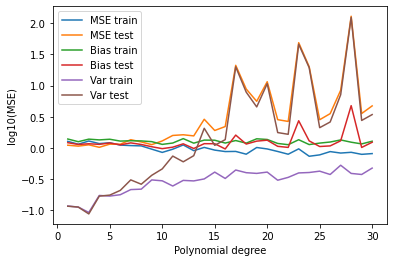

In [47]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(np.mean(mses_train, axis = 1)), label="MSE train")
plt.plot(ps, np.log10(np.mean(mses_test, axis = 1)), label="MSE test")
plt.plot(ps, np.log10(np.mean(bias_train, axis = 1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(bias_test, axis = 1)), label="Bias test")
plt.plot(ps, np.log10(np.mean(var_train, axis = 1)), label="Var train")
plt.plot(ps, np.log10(np.mean(var_test, axis = 1)), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# e)

In [22]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

model_complexity = 10
lambdas = np.logspace(-5,7, 100)

mses_train, Rs_train = np.zeros((model_complexity, len(lambdas))), np.zeros((model_complexity,len(lambdas)))
mses_test, Rs_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas)))
for p in range(1, model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,1,size=z.shape)
    znoisy = z + noise

    for i in range(len(lambdas)):
        lmbda = lambdas[i]
        ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ridge_fp_train_test_split(X = X, 
                                                                                                    y = znoisy, 
                                                                                                    lmbda = lmbda, 
                                                                                                  **{"test_size" : 0.3, 
                                                                                                    "random_state" : 42})
        #print(lmbda, Xtrain.shape, Xtest.shape)
        mses_train[p-1, i] = MSE(y = ztrain,ytilde = ztilde_train)
        Rs_train[p-1, i] = Rscore(y = ztrain, ytilde = ztilde_train)

        mses_test[p-1, i] = MSE(y = ztest,ytilde = ztilde_test)
        Rs_test[p-1, i] = Rscore(y = ztest, ytilde = ztilde_test)

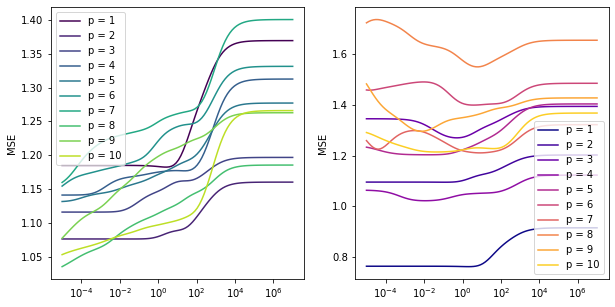

In [23]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.viridis(carr)
cs_test = plt.cm.plasma(carr)
fig, axs = plt.subplots(1,2, figsize=(10,5))
for ip in range(mses_train.shape[0]):
    axs[0].plot(lambdas, mses_train[ip], color = cs_train[ip], label="p = %i"%(ip+1))
    axs[1].plot(lambdas, mses_test[ip], color = cs_test[ip], label="p = %i"%(ip+1))
[ax.set_xscale('log') for ax in axs]
[ax.set_ylabel("MSE") for ax in axs]
[ax.set_xlabel("log10$\\lambda$")]
[ax.legend() for ax in axs]